
















































### Class 3 - Harjot Parhar(C0819473)

In [ ]:
import requests
import sys
import os
import json
import datetime
import string
import re
import math
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Twitter extraction

In [ ]:
class Scrapper:
    def __init__(self, keyword, dates = [], fixed_query = '', tweets_to_obtain_per_day = 800):
        self.keyword = keyword
        self.dates = dates
        self.fixed_query = fixed_query
        self.batches = int(tweets_to_obtain_per_day / 100)
        # Creates the dataframe for the keyword
        self.dataframe = pd.DataFrame()
    
    def file_name(self):
        clean_keyword = self.keyword.replace('@', '').replace('#', '')
        return f'data/tweets_{clean_keyword}.csv'

    def check_file_existence(self):
        return os.path.exists(self.file_name())
           
    def scrap_tweets(self, from_date):
        to_date = from_date + datetime.timedelta(days = 1)
        query = f'{self.fixed_query} {self.keyword} since:{from_date.strftime("%Y-%m-%d")} until:{to_date.strftime("%Y-%m-%d")}'
        result = sntwitter.TwitterSearchScraper(query) 
        df = pd.DataFrame(itertools.islice(result.get_items(), 50))
        if len(df) > 0:
            df['keyword'] = self.keyword
            self.dataframe = self.dataframe.append(df[['id', 'url', 'date', 'content', 'keyword']], ignore_index=True)
        
    def get_tweets(self):
        for from_date in self.dates:
            self.scrap_tweets(from_date)           
       
    def save(self):
        print(f'Saving {self.file_name()}')
        self.dataframe.to_csv(self.file_name())
        
    def load(self):
        print(f'Loading {self.file_name()}')
        self.dataframe = pd.read_csv(self.file_name())

In [ ]:
# Here we use a day as reference to get the tweets.
pivot_date = datetime.datetime(2022, 5, 23)
# Here we generate a list of the days we want to extract. We are choosing the last 90 days before the pivot date.
dates = [ pivot_date + datetime.timedelta(days = i) for i in range(-15, 0) ]
# We define a fixed query variable to make the extraction
fixed_query = ''
# Builds a list of relevant keywords for searching regarding the current government
keywords = [
    'monkeypox'
    ]

In [ ]:
for keyword in keywords:
    scrapper = Scrapper(keyword, dates, fixed_query, 1000)
    if scrapper.check_file_existence():
        # If the file already exists ommits the query to twitter API
        print(f'File {scrapper.file_name()} already exists.. skipping data extraction')
        continue
    # Gets tweet for each date
    scrapper.get_tweets()
    # Saves the file
    scrapper.save()   

C:\Users\rhenr\AppData\Local\Temp\ipykernel_9376\606035234.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dataframe = self.dataframe.append(df[['id', 'url', 'date', 'content', 'keyword']], ignore_index=True)
C:\Users\rhenr\AppData\Local\Temp\ipykernel_9376\606035234.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dataframe = self.dataframe.append(df[['id', 'url', 'date', 'content', 'keyword']], ignore_index=True)
C:\Users\rhenr\AppData\Local\Temp\ipykernel_9376\606035234.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dataframe = self.dataframe.append(df[['id', 'url', 'date', 'content', 'keyword']], ignore_index=True)
C:\Users\rhenr\AppData\Local\Temp\ipykernel_9376\606035234.py:24: FutureWarn

Saving data/tweets_monkeypox.csv


C:\Users\rhenr\AppData\Local\Temp\ipykernel_9376\606035234.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dataframe = self.dataframe.append(df[['id', 'url', 'date', 'content', 'keyword']], ignore_index=True)


In [ ]:
# Reads the tweets csv files and consolidates them in a single dataframe
complete_df = pd.DataFrame() 
for keyword in keywords:
    scrapper = Scrapper(keyword)
    # Loads the data from its corresponding CSV file
    scrapper.load()
    # Merges the data in a single dataframe
    complete_df = complete_df.append(scrapper.dataframe, ignore_index=True)

# We save the result in a CSV file
complete_df.to_csv('./data/complete_input_monkeypox.csv')

Loading data/tweets_monkeypox.csv


C:\Users\rhenr\AppData\Local\Temp\ipykernel_9376\2452661904.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  complete_df = complete_df.append(scrapper.dataframe, ignore_index=True)


## 1.2 Load dataset to pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# here we load the csv file to a dataframe
complete_df = pd.read_csv('./data/complete_input_monkeypox.csv')
# Here is a sample of the dataset
complete_df.tail()

,Unnamed: 0.1,Unnamed: 0,id,url,date,content,keyword
745,745,745,1528525813624209409,https://twitter.com/LTSmash420/status/15285258...,2022-05-22 23:58:47+00:00,⚠️ Hollande - au moins 7 jeunes enfants sont m...,monkeypox
746,746,746,1528525803939581952,https://twitter.com/BethM0406/status/152852580...,2022-05-22 23:58:44+00:00,I'm going to be pissed if I get monkeypox. Cov...,monkeypox
747,747,747,1528525797199314949,https://twitter.com/og_tigress/status/15285257...,2022-05-22 23:58:43+00:00,@Shauna92118487 @StokPrescott @ChaseMacTrades ...,monkeypox
748,748,748,1528525793609011202,https://twitter.com/Applesdad12/status/1528525...,2022-05-22 23:58:42+00:00,@JulieD213 Guess we have to wait for the tally...,monkeypox
749,749,749,1528525789460893697,https://twitter.com/FollowChadwick/status/1528...,2022-05-22 23:58:41+00:00,Monkeypox is hilarious. Also sad. Hilarious th...,monkeypox


In [ ]:
# The original size of the dataframe is of 42,140 rows and 8 columns
complete_df.shape

(750, 7)

# 2. Data pre-processing

### 2.1 Dataset basic formatting

In [ ]:
# Here we convert the date column to datetime, and also create a create an additional column with yyyy-mm-dd format.
complete_df['datetime'] = pd.to_datetime(complete_df['date'],cache=False)
complete_df['date'] = complete_df['datetime'].dt.normalize().dt.strftime('%Y-%m-%d')
complete_df.size
# We also add a 'week' column to analyze the results per week
complete_df['week'] = pd.PeriodIndex(pd.to_datetime(complete_df.date), freq='T').week

In [ ]:
# We have now 2 additional columns
complete_df.tail()

,Unnamed: 0.1,Unnamed: 0,id,url,date,content,keyword,datetime,week
745,745,745,1528525813624209409,https://twitter.com/LTSmash420/status/15285258...,2022-05-22,⚠️ Hollande - au moins 7 jeunes enfants sont m...,monkeypox,2022-05-22 23:58:47+00:00,20
746,746,746,1528525803939581952,https://twitter.com/BethM0406/status/152852580...,2022-05-22,I'm going to be pissed if I get monkeypox. Cov...,monkeypox,2022-05-22 23:58:44+00:00,20
747,747,747,1528525797199314949,https://twitter.com/og_tigress/status/15285257...,2022-05-22,@Shauna92118487 @StokPrescott @ChaseMacTrades ...,monkeypox,2022-05-22 23:58:43+00:00,20
748,748,748,1528525793609011202,https://twitter.com/Applesdad12/status/1528525...,2022-05-22,@JulieD213 Guess we have to wait for the tally...,monkeypox,2022-05-22 23:58:42+00:00,20
749,749,749,1528525789460893697,https://twitter.com/FollowChadwick/status/1528...,2022-05-22,Monkeypox is hilarious. Also sad. Hilarious th...,monkeypox,2022-05-22 23:58:41+00:00,20


# Clean the text

In [ ]:
porter = PorterStemmer()
words = set(nltk.corpus.words.words())
cachedStopWords = stopwords.words("english") + ['‘', '’', '“', '”']

class Cleaner:
    def __init__(self, df, features):
        self.result = df
        self.features = features
    
    def get_result(self):
        return self.result
    
    def drop_duplicates(self):
        df = self.result
        df.set_index('id', inplace=True)
        df = df[~df.index.duplicated(keep='first')]
        df['index'] = np.arange(len(df))
        df.set_index('index', inplace=True)
        self.result = df[self.features]

    def clean_data(self, text):
        #Remove numbers
        text = re.sub(r'[0-9]+', '', text)
        #Remove all words with a lenght less than 3
        text = re.sub(r'\b\w{1,2}\b', '', text)
        #Remove punctuation
        text = "".join([word.lower() for word in text if word not in string.punctuation])
        #Tokenize
        tokens = word_tokenize(text)
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        text = ([lemmatizer.lemmatize(word) for word in tokens if word not in cachedStopWords and word in words])
        #Remove stop-words
        text = " ".join([word for word in text if word not in cachedStopWords])
        return text
   
    def ex_hashtags(self, text):
        return list(part[1:] for part in text.split() if part.startswith('#'))
    
    def extract_hashtags(self):
        self.result['hashtags']=self.result['content'].apply(lambda x: self.ex_hashtags(x))
    
    def ex_usernames(self, text):
        return list(part[1:] for part in text.split() if part.startswith('@'))
    
    def extract_usernames(self):
        self.result['usernames']=self.result['content'].apply(lambda x: self.ex_usernames(x))
                    
    def extract_content(self):
        self.result['content_clean'] = self.result['content'].apply(lambda x: self.clean_data(x))
        self.result['content_clean_count'] = self.result['content_clean'].map(len)
        self.result = self.result[self.result['content_clean_count'] > 1]
        
    def fit_model(self):
        self.drop_duplicates()
        self.extract_content()
        self.extract_hashtags()
        self.extract_usernames()

In [ ]:
# Here we create the cleaner object and execute the clean functions
cleaner = Cleaner(complete_df, ['date','week','content','keyword'])
# This function performs all the cleaning functions in our Cleaner object
cleaner.fit_model()

In [ ]:
# Here we create a dataframe with the results of the Cleaner class
clean_df = cleaner.get_result()
# We reset the index
clean_df = clean_df.reset_index()
# Here we show the cleaned results. We have 40,475 rows after the process
print(clean_df.shape)
clean_df.tail()

(692, 9)


,index,date,week,content,keyword,content_clean,content_clean_count,hashtags,usernames
687,745,2022-05-22,20,⚠️ Hollande - au moins 7 jeunes enfants sont m...,monkeypox,variole singe dernier,21,"[variole, monkeypox, polqc]",[]
688,746,2022-05-22,20,I'm going to be pissed if I get monkeypox. Cov...,monkeypox,going get covid bad enough,26,[],[]
689,747,2022-05-22,20,@Shauna92118487 @StokPrescott @ChaseMacTrades ...,monkeypox,run monkey pox,14,[],"[Shauna92118487, StokPrescott, ChaseMacTrades]"
690,748,2022-05-22,20,@JulieD213 Guess we have to wait for the tally...,monkeypox,guess wait tally,16,[],[JulieD213]
691,749,2022-05-22,20,Monkeypox is hilarious. Also sad. Hilarious th...,monkeypox,hilarious also sad hilarious let blatantly con...,141,[],[]


# 3. TF-IDF vectorize the text

In [ ]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
tf = vectorizer.fit_transform(clean_df['content_clean']).toarray()
# feature_set tells us what word each column in the matric represents
feature_set = vectorizer.get_feature_names_out()

In [ ]:
tf.shape

(692, 20)

In [ ]:
tf

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tf)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf

,pc1,pc2
0,1.114798,0.015365
1,-0.495677,0.841546
2,-0.559968,1.064928
3,-0.267394,-0.251600
4,-0.505665,0.954142
...,...,...
687,-0.267394,-0.251600
688,-0.255223,-0.310649
689,1.114798,0.015365
690,-0.267394,-0.251600


In [ ]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca

array([0.26573912, 0.09192927])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

# Plot only 2 dimensions of the PCA

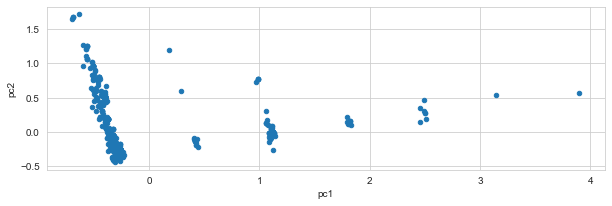

In [ ]:
principalDf.plot.scatter(x = 'pc1', y = 'pc2');

# K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = principalDf.values

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
#kmeans.labels_

In [ ]:
kmeans.labels_.shape

(692,)

In [ ]:
principalDf2 = principalDf
principalDf2['cluster'] = kmeans.labels_

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

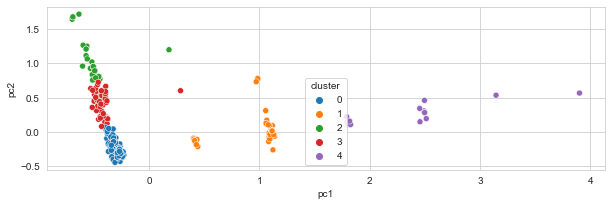

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot(data=principalDf2, x="pc1", y="pc2", hue="cluster",palette='tab10')

In [ ]:
clean_df2 = clean_df
clean_df2['cluster'] = kmeans.labels_